In [85]:
import pandas as pd

In [86]:
File = pd.read_csv(r"C:\Users\arshh\OneDrive\Desktop\AdvancedAI\heart-stroke-data\heart-data-discretized-train.csv")
data = pd.DataFrame(File)

In [5]:
File_2 = pd.read_csv(r"C:\Users\arshh\OneDrive\Desktop\AdvancedAI\heart-stroke-data\stroke-data-discretized-train.csv")
data_2 = pd.DataFrame(File)

In [87]:
from pgmpy.models import BayesianNetwork

In [88]:
model = BayesianNetwork([("target", "chol"), 
("target", "thalach"),
("chol", "restecg"),
("thalach", "thal"), ("target", "thal"), 
("thal", "fbs"), 
("thalach", "slope"), ("target", "slope"), ("chol", "slope"), ("restecg", "slope"), 
("thalach", "oldpeak"), ("slope", "oldpeak"), 
("fbs", "age"), ("target", "age"), ("thal", "age"), ("slope", "age"), ("restecg", "age"),
("slope", "sex"),("chol", "sex"),("restecg", "sex"),
("target", "cp"),("slope", "cp"),("restecg", "cp"), 
("thalach", "ca"),("target", "ca"),("fbs", "ca"),("age", "ca"),("oldpeak", "ca"), 
("thalach", "exang"),("thal", "exang"),("target", "exang"),("fbs", "exang"),("age", "exang"),
("restecg", "exang"),("sex", "exang"),
("thalach", "trestbps"), ("target", "trestbps"), ("age", "trestbps"), ("chol", "trestbps"),
("thal", "trestbps"),("restecg", "trestbps"),("oldpeak", "trestbps"),("cp", "trestbps")])

In [89]:
# model_2 = BayesianNetwork([("heart_disease", "gender"), 
# ("heart_disease", "work_type"),("heart_disease", "Residence_type"),
# ("heart_disease", "hypertension"), ("heart_disease", "work_type"), 
# ("heart_disease", "stroke"), ("hypertension", "stroke"), 
# ("stroke", "age"), ("hypertension", "age"), ("heart_disease", "age"),("work_type", "age"), 
# ("age", "ever_married"),("age", "bmi"), ("hypertension", "bmi"), ("age", "avg_glucose_level"), 
# ("stroke", "avg_glucose_level"), ("gender", "avg_glucose_level"),
# ("hypertension", "avg_glucose_level"),("heart_disease", "avg_glucose_level"),
# ("stroke", "smoking_status"),("heart_disease", "smoking_status"),("Residence_type", "smoking_status"),
# ("avg_glucose_level", "smoking_status"),("ever_married", "smoking_status"),("work_type", "smoking_status"),
# ("hypertension", "smoking_status"),("gender", "smoking_status"),("age", "smoking_status")])

In [11]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2,1,0,1,0,0,1,3,0,0,2,2,3,0
1,2,1,0,2,0,1,0,3,1,2,0,0,3,0
2,4,1,0,2,0,0,1,2,1,2,0,0,3,0
3,3,1,0,2,0,0,1,3,0,0,2,1,3,0
4,3,0,0,2,1,1,1,1,0,1,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,2,1,0,1,1,0,1,0,1,1,1,2,3,0
809,1,1,0,0,0,0,0,3,0,0,2,0,3,0
810,3,1,1,2,1,0,1,3,1,0,2,0,2,1
811,1,1,0,0,1,0,0,1,1,0,1,1,2,0


In [90]:
from pgmpy.estimators import ParameterEstimator
pe = ParameterEstimator(model, data)

In [91]:
#print("\n", pe.state_counts("cp"))

In [92]:
from pgmpy.estimators import MaximumLikelihoodEstimator, BicScore, HillClimbSearch
mle = MaximumLikelihoodEstimator(model, data)
#print(mle.estimate_cpd("target"))

In [93]:
model.fit(data, estimator=MaximumLikelihoodEstimator)
#for cpd in model.get_cpds():
#   print(cpd)

In [94]:
# use hill climb search to orient the edges:
hc = HillClimbSearch(data)
model = hc.estimate(scoring_method=BicScore(data))
sorted(model.nodes())
# best_model = hc.estimate(s)
# print("Part 2) Model:    ", model.edges())
# bic_new = BicScore(data)
# print(bic_new.score(new))

  0%|          | 0/1000000 [00:00<?, ?it/s]

['age',
 'ca',
 'chol',
 'cp',
 'exang',
 'fbs',
 'oldpeak',
 'restecg',
 'sex',
 'slope',
 'target',
 'thal',
 'thalach',
 'trestbps']

In [95]:
model.edges()

OutEdgeView([('age', 'trestbps'), ('sex', 'chol'), ('sex', 'ca'), ('cp', 'exang'), ('trestbps', 'fbs'), ('oldpeak', 'slope'), ('slope', 'thalach'), ('ca', 'age'), ('thal', 'target'), ('thal', 'sex'), ('target', 'cp'), ('target', 'ca'), ('target', 'oldpeak'), ('target', 'exang'), ('target', 'restecg'), ('target', 'thalach'), ('target', 'sex')])

In [97]:
hc.estimate(max_indegree=1).edges()

  0%|          | 0/1000000 [00:00<?, ?it/s]

OutEdgeView([('age', 'trestbps'), ('sex', 'chol'), ('cp', 'exang'), ('trestbps', 'fbs'), ('oldpeak', 'slope'), ('slope', 'thalach'), ('ca', 'age'), ('thal', 'target'), ('thal', 'sex'), ('target', 'cp'), ('target', 'ca'), ('target', 'oldpeak'), ('target', 'restecg')])

In [98]:
# from pgmpy.estimat>ors import BayesianEstimator
# est = BayesianEstimator(model, data)

In [99]:
# print(est.estimate_cpd("target", prior_type = "BDeu", equivalent_sample_size=10))

In [100]:
bic = BicScore(data)
b = bic.score(model)
print(b)

-10065.60702221339


In [101]:
new = BayesianNetwork(model)

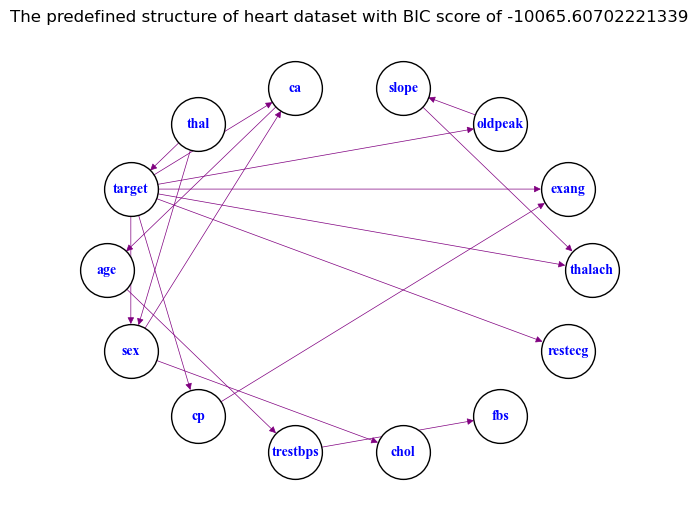

<Figure size 640x480 with 0 Axes>

In [102]:
import matplotlib.pyplot as plt
import networkx as nx
#fig = plt.figure()
nx.draw_shell(model, with_labels=True,
              node_color = "white", node_size = 1500,
              font_color = "blue", font_size = 10, 
              font_family = "Times New Roman", font_weight = "bold",
              edgecolors = "black", edge_color = "purple", 
              linewidths = 1, width = 0.5)
plt.margins(0.1)
plt.title(f"The predefined structure of heart dataset with BIC score of {b}")
#plt.savefig("model.png", format="PNG")
plt.show()
plt.clf()

## Let's remove some edges that seem unnecessary

In [103]:
model_1 = BayesianNetwork([ 
("target", "thalach"),
("thalach", "thal")])

In [104]:
model_1.fit(data, estimator=MaximumLikelihoodEstimator)
#for cpd in model.get_cpds():
#   print(cpd)

In [105]:
# use hill climb search to orient the edges:
hc_1 = HillClimbSearch(data)
model_1 = hc_1.estimate(scoring_method=BicScore(data))
#sorted(model_1.nodes())
# best_model = hc.estimate(s)
# print("Part 2) Model:    ", model.edges())
# bic_new = BicScore(data)
# print(bic_new.score(new))

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [106]:
hc_1.estimate(max_indegree=1).edges()

  0%|          | 0/1000000 [00:00<?, ?it/s]

OutEdgeView([('age', 'trestbps'), ('sex', 'chol'), ('cp', 'exang'), ('trestbps', 'fbs'), ('oldpeak', 'slope'), ('slope', 'thalach'), ('ca', 'age'), ('thal', 'target'), ('thal', 'sex'), ('target', 'cp'), ('target', 'ca'), ('target', 'oldpeak'), ('target', 'restecg')])

In [107]:
bic = BicScore(data)
b1 = bic.score(model_1)
print(b1)

-10065.60702221339


In [108]:
new_1 = BayesianNetwork(model_1)

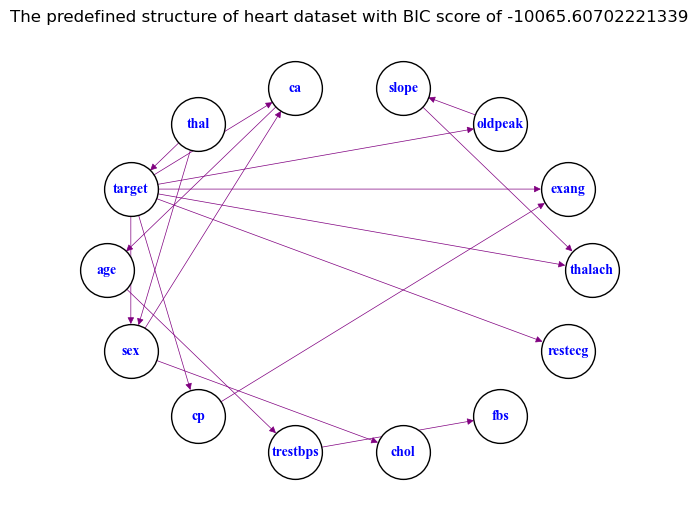

<Figure size 640x480 with 0 Axes>

In [109]:
import matplotlib.pyplot as plt
import networkx as nx
#fig = plt.figure()
nx.draw_shell(model_1, with_labels=True,
              node_color = "white", node_size = 1500,
              font_color = "blue", font_size = 10, 
              font_family = "Times New Roman", font_weight = "bold",
              edgecolors = "black", edge_color = "purple", 
              linewidths = 1, width = 0.5)
plt.margins(0.1)
plt.title(f"The predefined structure of heart dataset with BIC score of {b1}")
#plt.savefig("model.png", format="PNG")
plt.show()
plt.clf()